In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
df = pd.read_csv("/content/placement (1).csv")

In [3]:
df.sample(5)

,cgpa,placement_exam_marks,placed
288,7.07,21.0,0
60,7.94,31.0,1
756,7.41,30.0,1
109,7.23,21.0,1
375,7.31,31.0,0


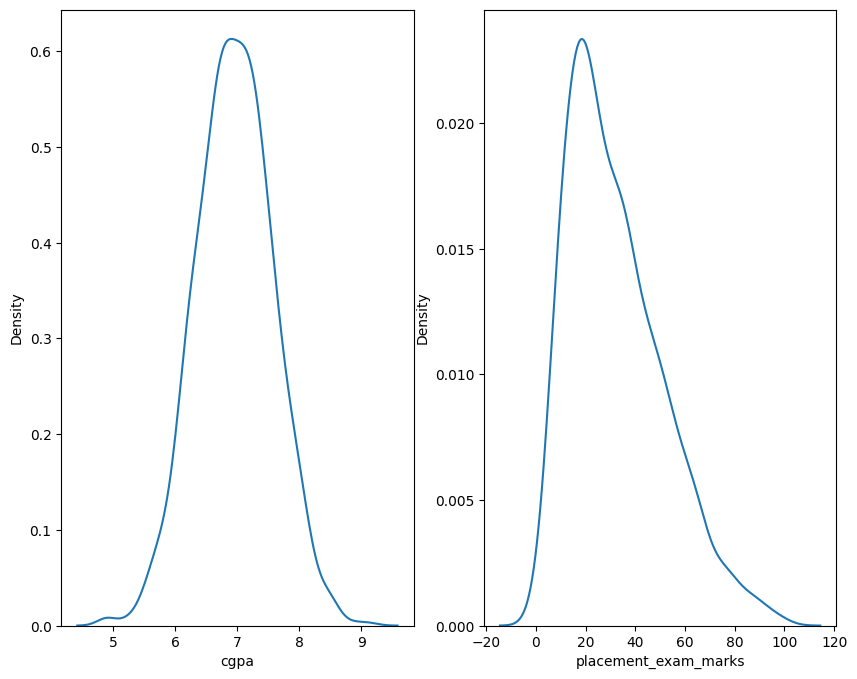

In [5]:
plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
sns.kdeplot(df["cgpa"])

plt.subplot(1,2,2)
sns.kdeplot(df["placement_exam_marks"])

plt.show()

In [12]:
from scipy.stats import zscore
df["cgpa_zscore"] = zscore(df["cgpa"])

In [13]:
df.sample(5)

,cgpa,placement_exam_marks,placed,cgpa_zscore
579,7.13,13.0,0,0.274144
662,7.38,15.0,1,0.680258
170,6.17,37.0,0,-1.285336
122,5.97,51.0,0,-1.610228
103,6.44,18.0,1,-0.846733


In [18]:
df[(df["cgpa_zscore"] > 3) | (df["cgpa_zscore"] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.315909
995,8.87,44.0,1,3.100701
996,9.12,65.0,1,3.506815
997,4.89,34.0,0,-3.364643
999,4.90,10.0,1,-3.348398


In [19]:
new_df = df[(df["cgpa_zscore"] < 3) & (df["cgpa_zscore"] > -3)]

In [20]:
new_df.shape

(995, 4)

In [21]:
upper_limit = df["cgpa"].mean() + 3*(df["cgpa"].std())

In [22]:
lower_limit = df["cgpa"].mean() - 3*(df["cgpa"].std())

In [23]:
df["cgpa"] = np.where(df["cgpa"] > upper_limit, upper_limit, df["cgpa"])
df["cgpa"] = np.where(df["cgpa"] < lower_limit, lower_limit, df["cgpa"])

In [25]:
df.shape

(1000, 4)